In [1266]:
# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/home/sagemaker-user/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/home/sagemaker-user/' 

In [1267]:
import os

In [1268]:
os. getcwd()

'/root'

In [1269]:
os.listdir()

['cont_corr_matrix.png',
 'feature_importance.png',
 'sys_dia_avg.JPG',
 'train.csv',
 '.config',
 '.keras',
 'Fine-Tuning.ipynb',
 'age_diabetes.JPG',
 '.cache',
 'pmlm_models_shallow.ipynb',
 'test.csv',
 '.ipynb_checkpoints',
 'pmlm_utilities_shallow.ipynb',
 'CloudComputing-Copy1.ipynb',
 '.sagemaker-jumpstart-tasks-status.json',
 '.jupyter',
 '.ipython',
 'Untitled.ipynb',
 '.local',
 '.yarnrc',
 'corr_matrix.png',
 'heart_rate_smoking_chd.JPG',
 'gender_distribution.JPG',
 'target_variable_class_distribution.png',
 'heart_rate_smoking_chd.png',
 'age_group_distribution.JPG',
 'gender_distribution.png',
 'ExploratoryDataAnalysis.ipynb',
 'target_variable_class_distribution.jpg',
 'result',
 'feature_importance_rfc.pdf']

In [1270]:
# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

In [1271]:
bucket = 'cloudcomputingdata'

In [1272]:
from sagemaker import get_execution_role
role = get_execution_role()

In [1273]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [1274]:
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket)['Contents']
files = []
for f in contents:
    #print(f)
    files.append(f['Key'])

print(files)

['test_heartdisease.csv', 'train_heartdisease.csv']


In [1275]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('cloudcomputingdata')
# Iterates through all the objects
files = []
for obj in bucket.objects.all():
    key = obj.key
    files.append(key)
    body = obj.get()['Body'].read()
    files.append(body)
    
test = files[1]
train = files[3]
    
from io import StringIO

s_test=str(test,'utf-8')
test_data = StringIO(s_test) 
df_raw_test=pd.read_csv(test_data,header=0)

s_train = str(train,'utf-8')
train_data = StringIO(s_train)
df_raw_train = pd.read_csv(train_data,header=0)



In [1276]:
df_raw_test.to_csv("test.csv")
df_raw_train.to_csv("train.csv")

In [1277]:
df_raw_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [1278]:
df_raw_test.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [1279]:
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'TenYearCHD'

In [1280]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,3390,17


In [1281]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,848,16


In [1282]:
df_train['sex'][df_train['sex'] == 'F'] = 0
df_train['sex'][df_train['sex'] == 'M'] = 1
df_train['is_smoking'][df_train['is_smoking'] == 'NO'] = 0
df_train['is_smoking'][df_train['is_smoking'] == 'YES'] = 1
df_train

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [1283]:
#devision features into groups
numerical_features=["age","cigsPerDay","BPMeds","sysBP","diaBP","BMI","heartRate","glucose", 'totChol'] #numerical features
categorical_features=["sex","prevalentStroke","prevalentStroke","prevalentHyp", 'diabetes',"education", 'is_smoking'] #categorical features
numerical_dataset=df_train.drop(categorical_features,axis=1) #partial dataset that includes only the numerical features
categorical_dataset=df_train.drop(numerical_features,axis=1) #partial dataset that includes only the categorical features

In [1284]:
def preset_correlation_of_Xy(dataset,title): #present correlation matrix of features and lable in a dataset 
    f,ax = plt.subplots(figsize=(24,20))
    corr=dataset.corr()    
    sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size':20}, ax=ax)
    ax.set_title(title, fontsize=20)
    plt.show()
    plt.savefig("cont_corr_matrix.png")
    

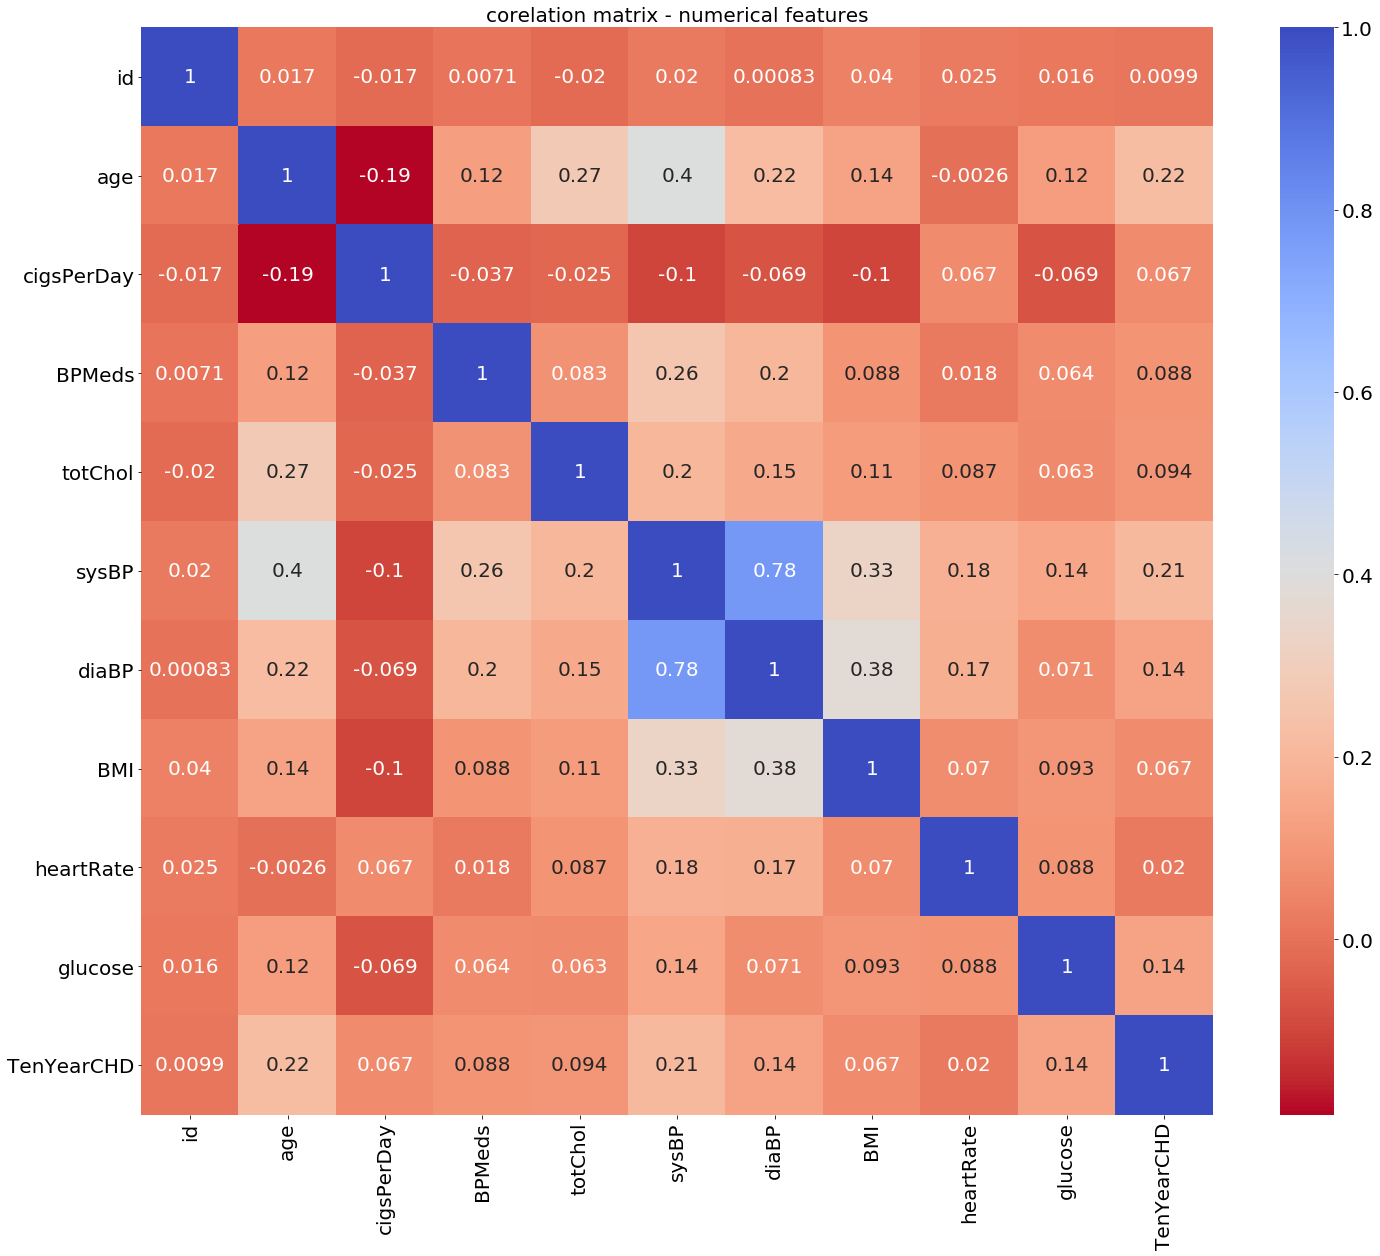

<Figure size 432x288 with 0 Axes>

In [1285]:
#present correlation matrix of numerical features and lable 
import seaborn as sns
preset_correlation_of_Xy(numerical_dataset,"corelation matrix - numerical features")

In [1286]:
file_name = "cont_corr_matrix.png"
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'tempgraphstorage', 'cont_corr_matrix')

In [1287]:
pip install tensorflow==2.7.0

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [1288]:
# The magic below allows us to use tensorflow version 2.x
#%tensorflow_version 1.x 
import tensorflow as tf
from tensorflow import keras

In [1289]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

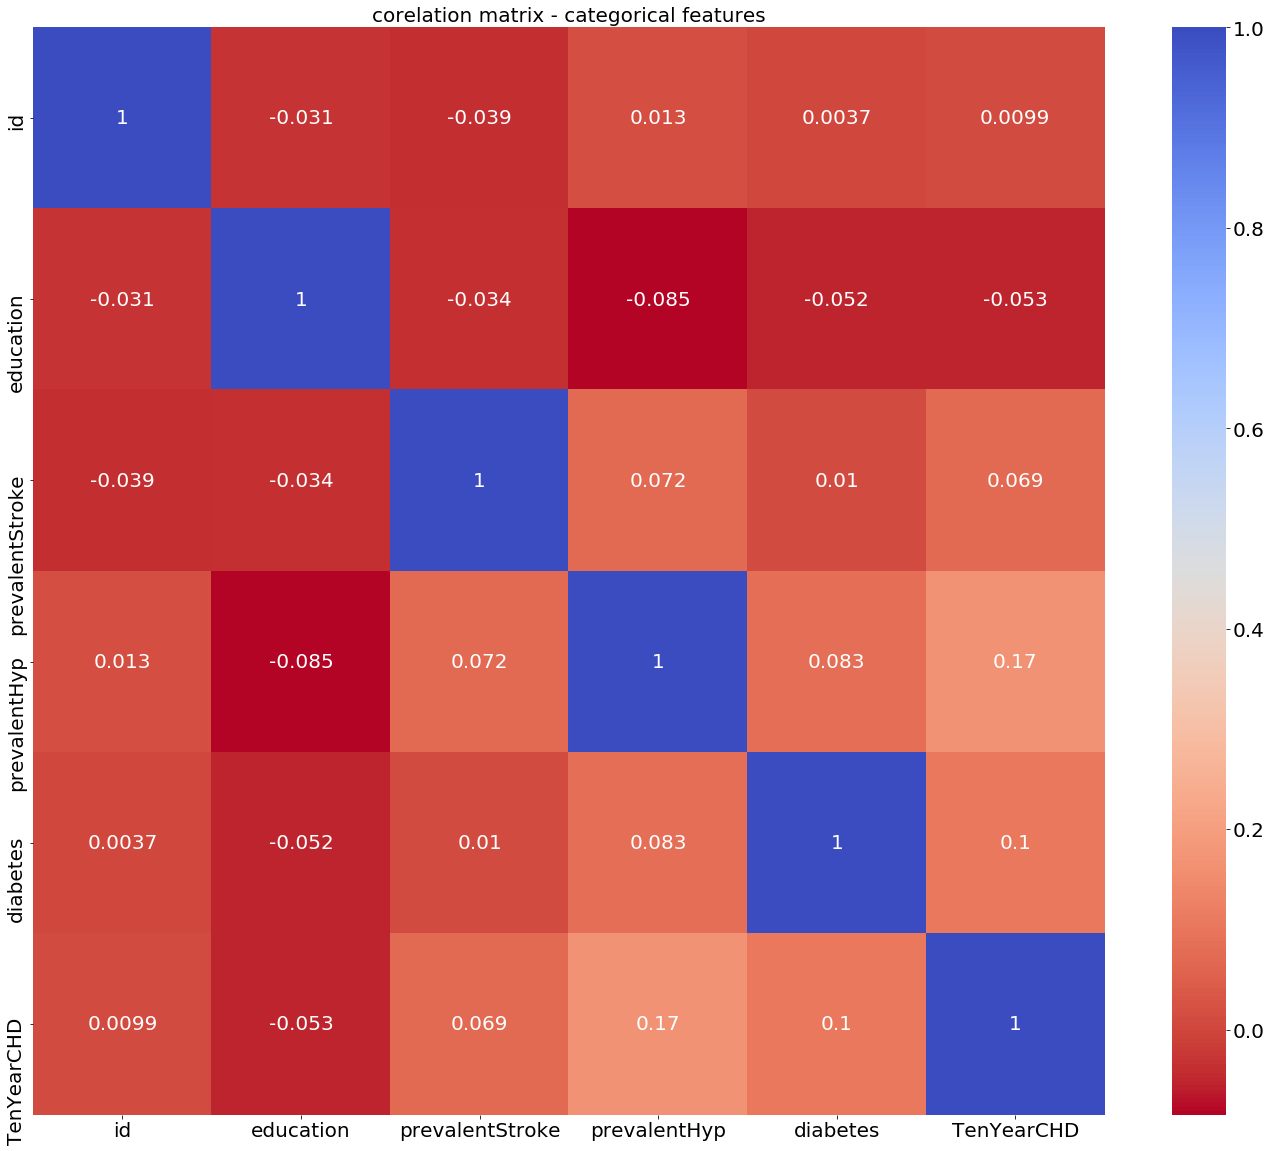

<Figure size 432x288 with 0 Axes>

In [1290]:
#present correlation matrix of categorical features and lable 
preset_correlation_of_Xy(categorical_dataset,"corelation matrix - categorical features")

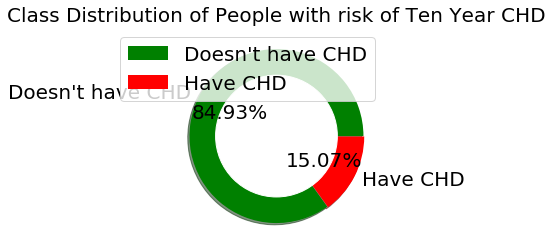

In [1291]:
size = df_train['TenYearCHD'].value_counts()
colors = ['green', 'red']
labels = "Doesn't have CHD", "Have CHD"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')
fig = plt.figure()
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Class Distribution of People with risk of Ten Year CHD', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()
#plt.savefig("target_variable_class_distribution.png")

my_file = "target_variable_class_distribution.jpg"
fig.savefig(os.path.join(my_path, my_file))

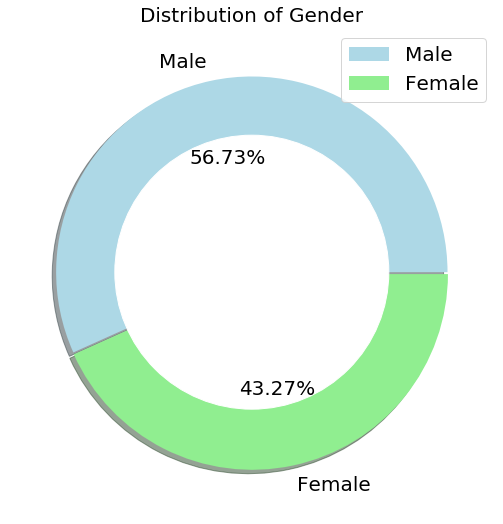

In [1292]:
size = df_train['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')
fig = plt.figure()
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()
my_file = "gender_distribution.JPG"
fig.savefig(os.path.join(my_path, my_file))

(511, 18)


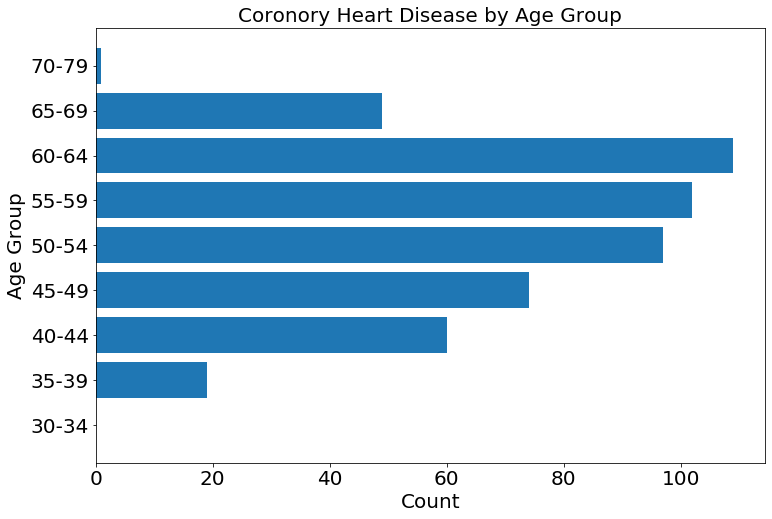

<Figure size 648x648 with 0 Axes>

In [1293]:
#Cleaning up Age Columns
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')
#print (age)

df_new = df_train
df_new['AgeGroup'] = age['AgeGroup']

#==============
#Age and Heart Disease
chd = df_new[df_new['TenYearCHD']==1]
print(chd.shape)
age_chd = chd.groupby('AgeGroup')['TenYearCHD'].count()

fig = plt.figure(figsize = (12,8))
plt.title('Coronory Heart Disease by Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.barh(age_chd.index,age_chd.values)
ax.invert_yaxis()
plt.show()
plt.savefig("age_group_distribution.JPG")
my_file = "age_group_distribution.JPG"
fig.savefig(os.path.join(my_path, my_file))

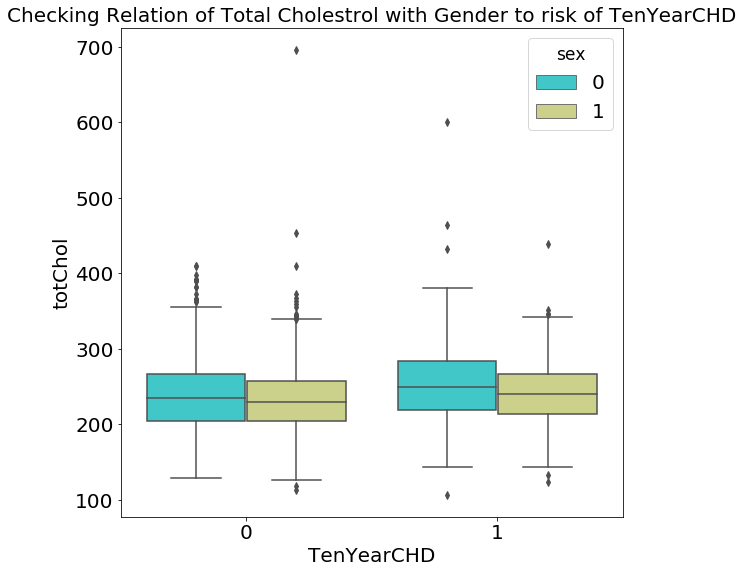

In [1294]:
sns.boxplot(x = df_train['TenYearCHD'], y = df_train['totChol'], hue = df_train['sex'], palette = 'rainbow')
plt.title('Checking Relation of Total Cholestrol with Gender to risk of TenYearCHD', fontsize = 20, fontweight = 30)
plt.show()

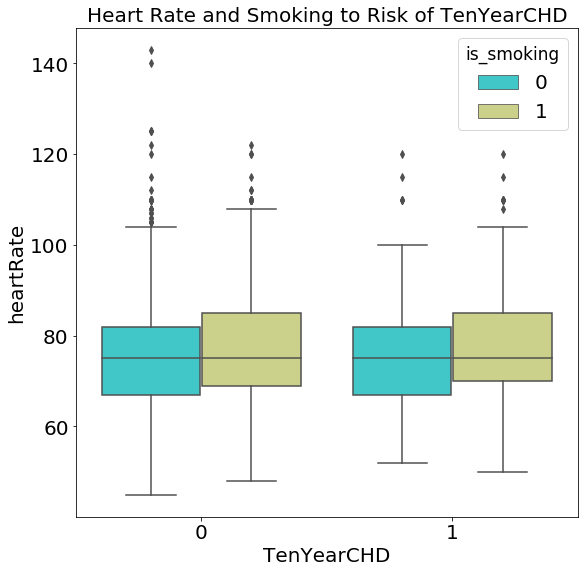

In [1295]:
fig = plt.figure()
sns.boxplot(x = df_train['TenYearCHD'], y = df_train['heartRate'], hue = df_train['is_smoking'], palette = 'rainbow')

plt.title('Heart Rate and Smoking to Risk of TenYearCHD', fontsize = 20, fontweight = 30)
plt.show()
my_file = "heart_rate_smoking_chd.JPG"
fig.savefig(os.path.join(my_path, my_file))

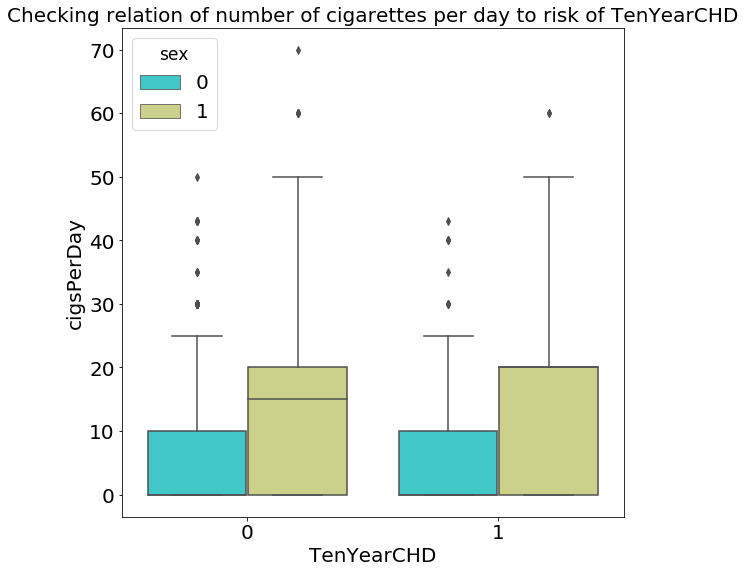

In [1296]:
sns.boxplot(x = df_train['TenYearCHD'], y = df_train['cigsPerDay'], hue = df_train['sex'], palette = 'rainbow')
plt.title('Checking relation of number of cigarettes per day to risk of TenYearCHD', fontsize = 20, fontweight = 30)
plt.show()

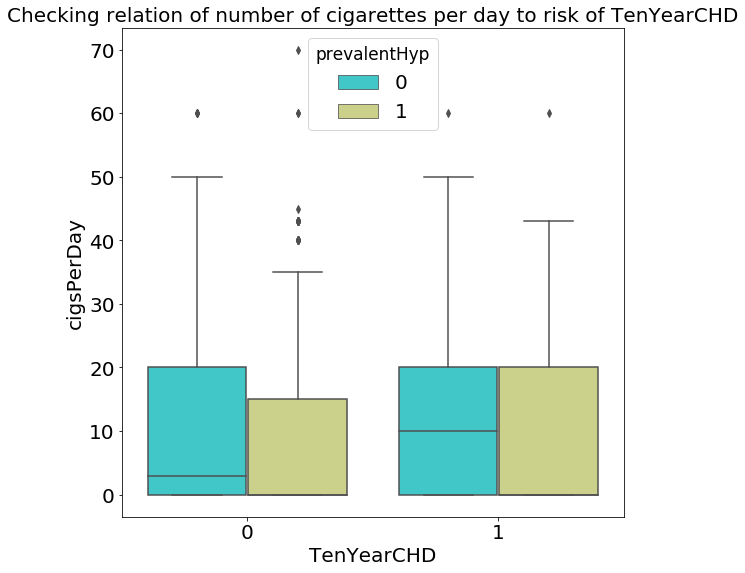

In [1297]:
sns.boxplot(x = df_train['TenYearCHD'], y = df_train['cigsPerDay'], hue = df_train['prevalentHyp'], palette = 'rainbow')
plt.title('Checking relation of number of cigarettes per day to risk of TenYearCHD', fontsize = 20, fontweight = 30)
plt.show()

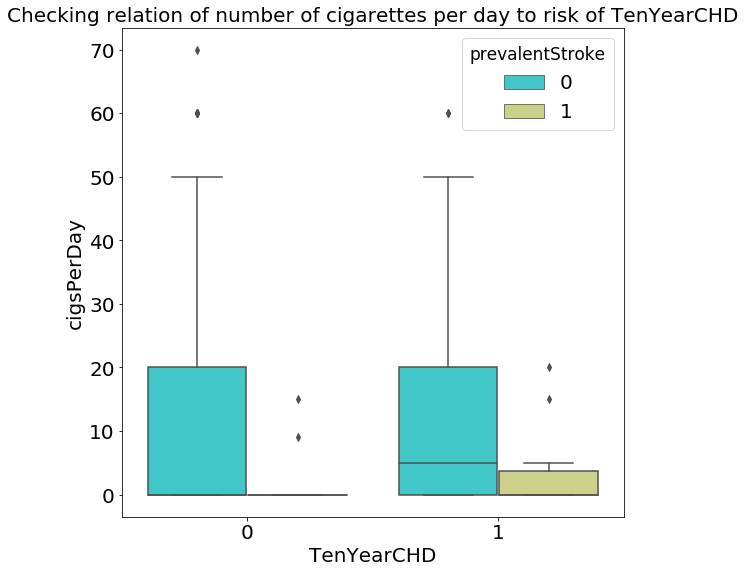

In [1298]:
sns.boxplot(x = df_train['TenYearCHD'], y = df_train['cigsPerDay'], hue = df_train['prevalentStroke'], palette = 'rainbow')
plt.title('Checking relation of number of cigarettes per day to risk of TenYearCHD', fontsize = 20, fontweight = 30)
plt.show()

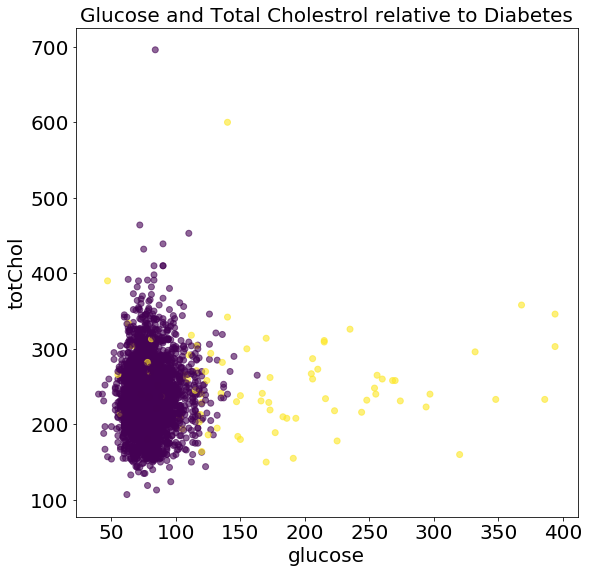

In [1299]:
#Glucose and Cholosterol and Diabetes
totChol = df_train['totChol']
glucose = df_train['glucose']
diabetes = df_train['diabetes']

plt.figure()
plt.scatter(glucose,totChol,c =diabetes, alpha = 0.6)
#plt.legend(["People with Diabetes" , "People without Diabetes"])
plt.title('Glucose and Total Cholestrol relative to Diabetes')
plt.xlabel('glucose')
plt.ylabel('totChol')


# plt.legend()
plt.show()



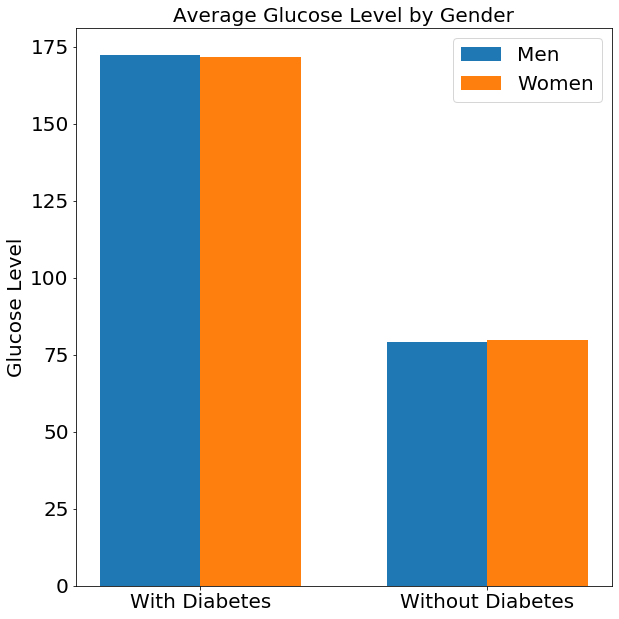

In [1300]:
#
gluc_diab = df_train[df_train['diabetes']==1]
gluc_diab_male = gluc_diab[gluc_diab['sex']==1]['glucose'].mean()
gluc_diab_female = gluc_diab[gluc_diab['sex']==0]['glucose'].mean()

gluc_nodiab = df_train[df_train['diabetes']==0]
gluc_nodiab_male = gluc_nodiab[gluc_nodiab['sex']==1]['glucose'].mean()
#print(gluc_nodiab_male)
gluc_nodiab_female = gluc_nodiab[gluc_nodiab['sex']==0]['glucose'].mean()
#print(gluc_nodiab_female)



#

data = [[gluc_diab_male,gluc_nodiab_male],
[gluc_diab_female,gluc_nodiab_female]]

labels = ['With Diabetes','Without Diabetes']
men_means = data[0]
women_means = data[1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Glucose Level')
ax.set_title('Average Glucose Level by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#fig.bar_label(rects1, padding=3)
#fig.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

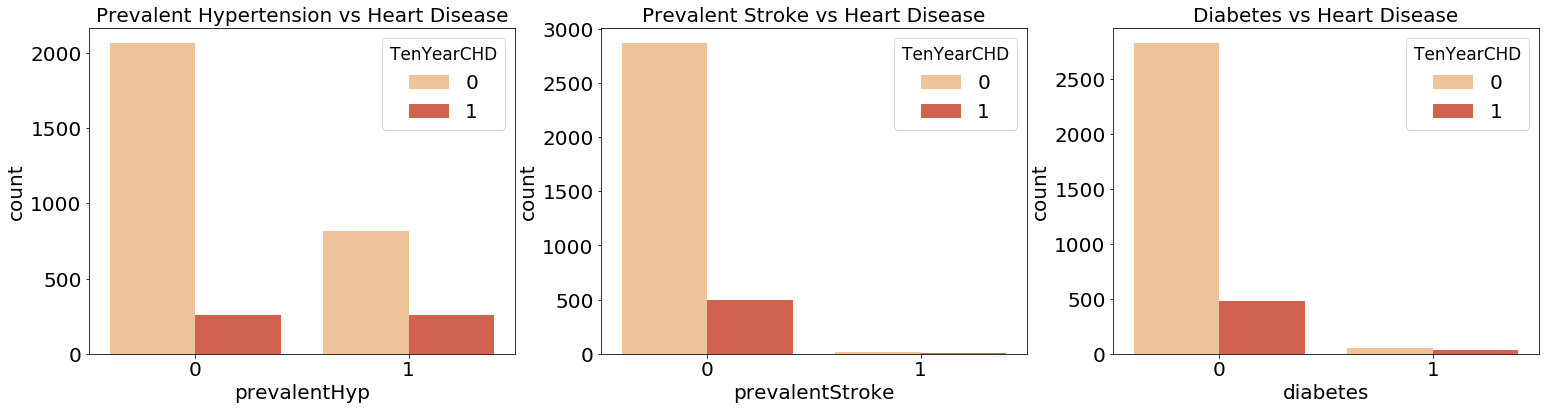

In [1301]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='prevalentHyp', data=df_train, hue='TenYearCHD', palette='OrRd')
    p1.set_title('Prevalent Hypertension vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='prevalentStroke', data=df_train, hue='TenYearCHD', palette='OrRd')
    p2.set_title('Prevalent Stroke vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='diabetes', data=df_train, hue='TenYearCHD', palette='OrRd')
    p3.set_title('Diabetes vs Heart Disease')
    
plot6()


In [1302]:
chol_bins = [100,150,200,250,300,350,400,450]
df_train['bin_chol'] = pd.cut(df_train['totChol'], bins=chol_bins)
max_hr_bins = [60,80,100,120,140,160,180,200,220]
df_train['bin_max_hr'] = pd.cut(df_train['heartRate'], bins=max_hr_bins)

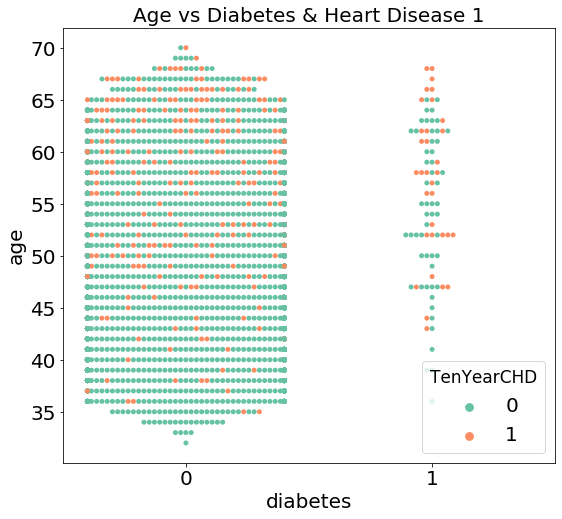

In [1303]:
def plot8():
    fig = plt.figure(figsize=(30,8))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='diabetes', y='age', data=df_train, hue='TenYearCHD', palette='Set2')
    p1.set_title('Age vs Diabetes & Heart Disease 1')
    
    my_file = "age_diabetes.JPG"
    fig.savefig(os.path.join(my_path, my_file))
        
#     plt.subplot(1,3,2)
#     p2 = sns.swarmplot(x='bin_chol', y='age', data=df_train, hue='TenYearCHD', palette='Set2')
#     p2.set_title('Age vs Total_Cholestrol & Heart Disease')
#     plt.xticks(rotation = 45)
    
#     plt.subplot(1,3,3)
#     p3 = sns.swarmplot(x='prevalentStroke',y='age', data=df_train, hue='TenYearCHD', palette='Set2')
#     p3.set_title('Age vs Prevalent Stroke & Heart Disease')
#     plt.xticks(rotation = 45)
#     plt.show()
plot8()

In [1304]:
import plotly.express as px
df = px.data.tips()
fig = px.strip(df_train, x="age", y="glucose", orientation="h", color="TenYearCHD", title="Glucose Levels and CHD")
fig.show()

In [1305]:
import plotly.express as px
df = px.data.tips()
fig = px.strip(df_train, x="age", y="heartRate", orientation="h", color="TenYearCHD", title="Heart Rate and Stoke")
fig.show()

In [1306]:
!pip install plotly==4.14.3

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [1307]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.strip(df_train, x="age", y="BMI", orientation="h", color="TenYearCHD", title="Body Mass Index and Ten Year CHD")
# fig.add_hrect(y=25, line_width=3, line_dash="dash", line_color="green")
# fig.show()

import plotly.express as px
df = px.data.iris()
fig = px.strip(df_train, x="age", y="BMI", orientation="h", color="TenYearCHD", title="Body Mass Index and Ten Year CHD")
# fig.add_vline(x=2.5, line_width=3, line_dash="dash", line_color="green")
fig.add_hline(y=25, line_dash="dot")
fig.show()

No handles with labels found to put in legend.


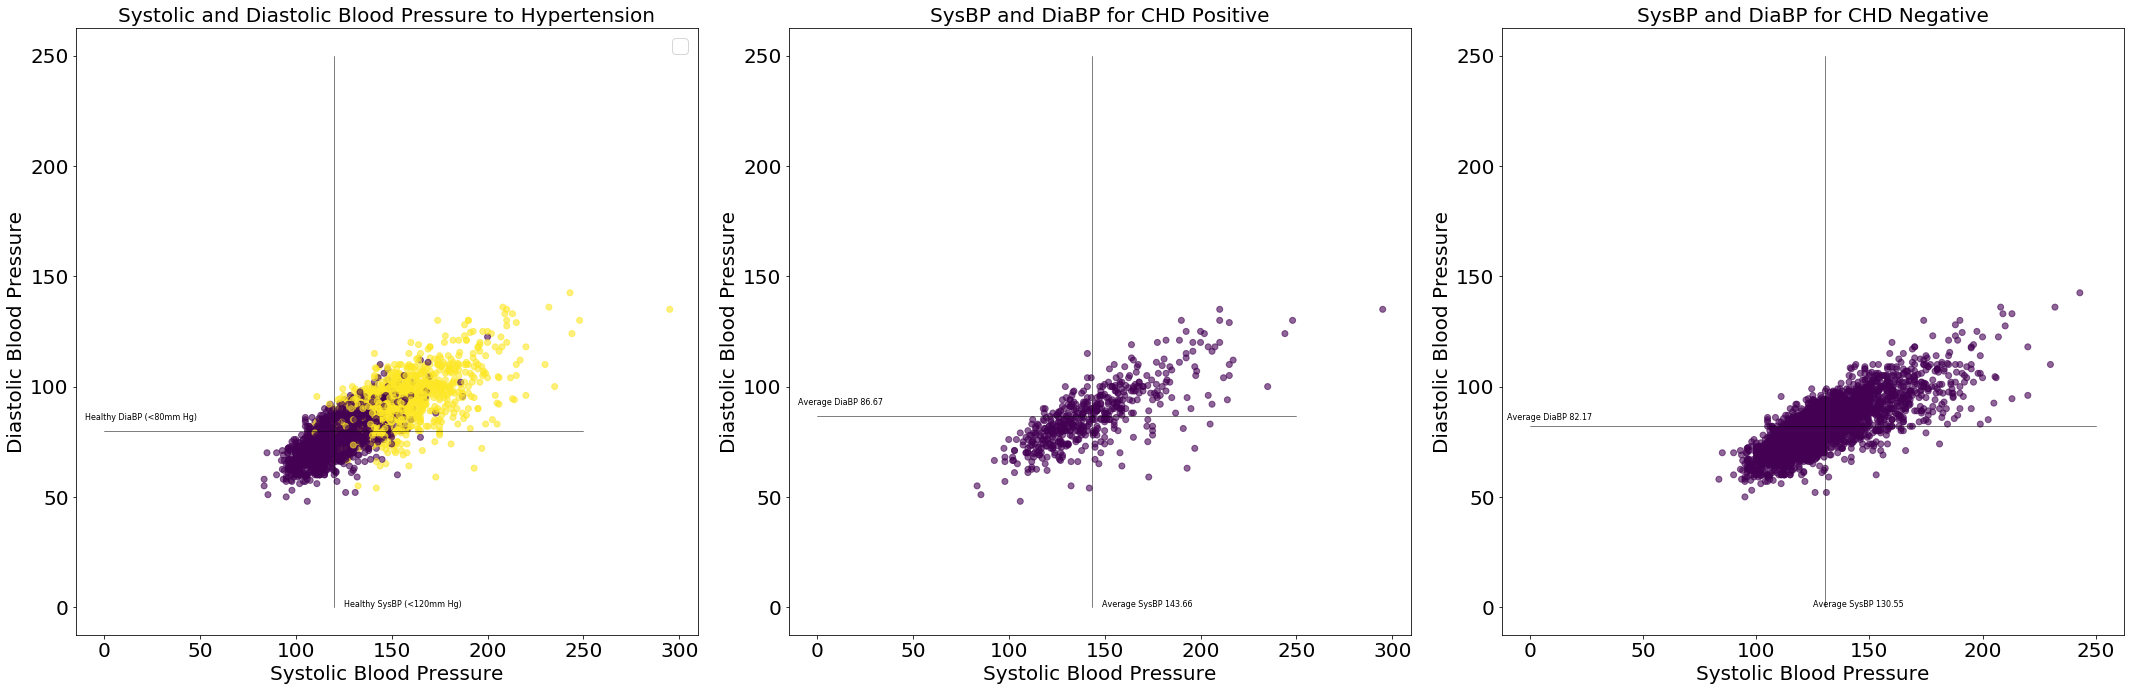

<Figure size 648x648 with 0 Axes>

In [1308]:
totChol = df_train['totChol']
glucose = df_train['glucose']
diabetes = df_train['diabetes']
chd = df_train['TenYearCHD']
sysbp = df_train['sysBP']
diabp = df_train['diaBP']
hypertension = df_train['prevalentHyp']
stroke = df_train['prevalentStroke']

avg_sysbp = sysbp.mean()
avg_diabp = diabp.mean()

df1 = df_train[df_train['prevalentStroke']==0]

yes_chd = df1[df1['TenYearCHD']==1]
yeschd_stroke = yes_chd['prevalentStroke']
no_chd = df1[df1['TenYearCHD']==0]
nochd_stroke = no_chd['prevalentStroke']

yes_chd_hypertension = yes_chd['prevalentHyp']
no_chd_hypertension = no_chd['prevalentHyp']

#Calculating Average Systolic and Diastolic Blood Pressure for those with and without Hypertension
#yes_hypertension = yes_chd[yes_chd['prevalentHyp']==1]
yeschd_sysbp = yes_chd['sysBP']
yeschd_sysbp_avg = yes_chd['sysBP'].mean()
yeschd_diabp = yes_chd['diaBP']
yeschd_diabp_avg = yes_chd['diaBP'].mean()
#no_hypertension = no_chd[no_chd['prevalentHyp']==0]
nochd_sysbp = no_chd['sysBP']
nochd_sysbp_avg = no_chd['sysBP'].mean()
nochd_diabp = no_chd['diaBP']
nochd_diabp_avg = no_chd['diaBP'].mean()


#Systolic and Diastolic Blood Pressure and Hypertension (ALL Samples)
fig = plt.figure(figsize=(30,10))
#fig.tight_layout(pad = 4)
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(sysbp,diabp,c =hypertension, alpha = 0.6)
ax1.plot([120, 120], [0, 250], 'k-', lw=0.5)
ax1.plot([0, 250], [80, 80], 'k-', lw=0.5)
plt.text(-10, 85, r'Healthy DiaBP (<80mm Hg)', fontsize=8)
plt.text(125, 0, r'Healthy SysBP (<120mm Hg)', fontsize=8)
ax1.set_title('Systolic and Diastolic Blood Pressure to Hypertension')
ax1.set_xlabel('Systolic Blood Pressure')
ax1.set_ylabel('Diastolic Blood Pressure')
ax1.legend()
plt.tight_layout()
#plt.show()

#Systolic and Diastolic Blood Pressure and Hypertension (YES CHD)
#fig = plt.figure()
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(yeschd_sysbp,yeschd_diabp,c=yeschd_stroke, alpha = 0.6)
ax2.plot([yeschd_sysbp_avg, yeschd_sysbp_avg], [0, 250], 'k-', lw=0.5)
ax2.plot([0, 250], [yeschd_diabp_avg, yeschd_diabp_avg], 'k-', lw=0.5)
plt.text(-10, yeschd_diabp_avg+5, rf'Average DiaBP {round(yeschd_diabp_avg,2)}', fontsize=8)
plt.text(yeschd_sysbp_avg + 5, 0, rf'Average SysBP {round(yeschd_sysbp_avg,2)}', fontsize=8)
ax2.set_title('SysBP and DiaBP for CHD Positive')
ax2.set_xlabel('Systolic Blood Pressure')
ax2.set_ylabel('Diastolic Blood Pressure')
plt.tight_layout()
#plt.show()

#Systolic and Diastolic Blood Pressure and Hypertension (NO CHD)
#fig = plt.figure()
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(nochd_sysbp,nochd_diabp,c=nochd_stroke, alpha = 0.6)
ax3.plot([nochd_sysbp_avg, nochd_sysbp_avg], [0, 250], 'k-', lw=0.5)
ax3.plot([0, 250], [nochd_diabp_avg, nochd_diabp_avg], 'k-', lw=0.5)
plt.text(-10, 85, rf'Average DiaBP {round(nochd_diabp_avg,2)}', fontsize=8)
plt.text(125, 0, rf'Average SysBP {round(nochd_sysbp_avg,2)} ', fontsize=8)
ax3.set_title('SysBP and DiaBP for CHD Negative')
ax3.set_xlabel('Systolic Blood Pressure')
ax3.set_ylabel('Diastolic Blood Pressure')
#ax3.show()
plt.tight_layout()
plt.show()
plt.savefig("sys_dia_avg.JPG")
#https://www.cdc.gov/bloodpressure/about.htm


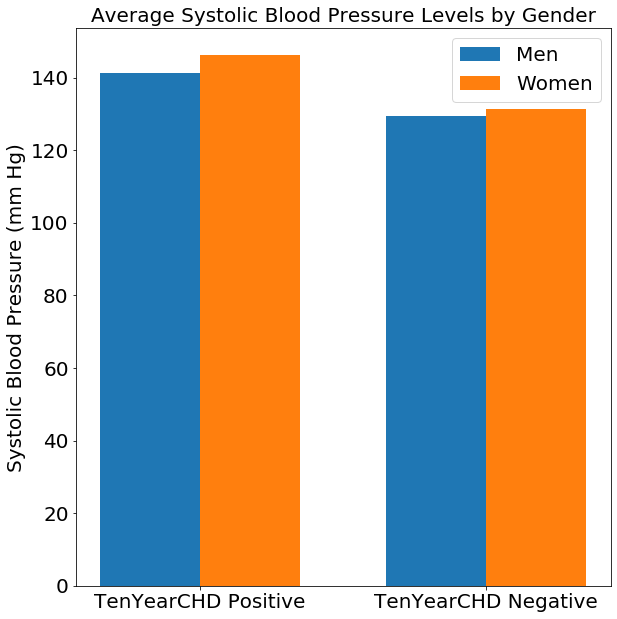

In [1309]:

#HYPERTENSION AND GENDER
yeschd_sysbp_male = yes_chd[yes_chd['sex']==1]['sysBP'].mean()
yeschd_sysbp_female = yes_chd[yes_chd['sex']==0]['sysBP'].mean()

yeschd_diabp_male = yes_chd[yes_chd['sex']==1]['diaBP'].mean()
yeschd_diabp_female = yes_chd[yes_chd['sex']==0]['diaBP'].mean()

nochd_sysbp_male = no_chd[no_chd['sex']== 1]['sysBP'].mean()
nochd_sysbp_female = no_chd[no_chd['sex']== 0]['sysBP'].mean()

nochd_diabp_male = no_chd[no_chd['sex']== 1]['diaBP'].mean()
nochd_diabp_female = no_chd[no_chd['sex']==0]['diaBP'].mean()

data = [[yeschd_sysbp_male,nochd_sysbp_male],
[yeschd_sysbp_female,nochd_sysbp_female]]

labels = ['TenYearCHD Positive','TenYearCHD Negative']
men_means = data[0]
women_means = data[1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Systolic Blood Pressure (mm Hg)')
ax.set_title('Average Systolic Blood Pressure Levels by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#fig.bar_label(rects1, padding=3)
#fig.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


<Figure size 648x648 with 0 Axes>

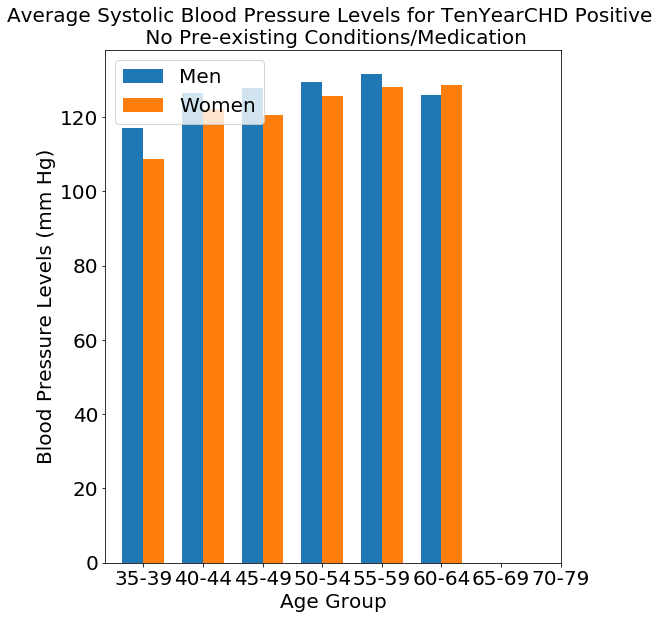

In [1310]:
#Systolic Blood Pressure by Age Group (NO Pre-existing conditions)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')

df_new = df_train

df_new['AgeGroup'] = age['AgeGroup']
chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==0]
chd3 = chd2[chd2['prevalentStroke']==0]
chd4 = chd3[chd3['BPMeds']==0]
chd = chd4[chd4['diabetes']==0]
#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']== 1]['sysBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['sysBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']== 1]['sysBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']== 0]['sysBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']== 1]['sysBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']== 0 ]['sysBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']== 1]['sysBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']== 0]['sysBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']== 1]['sysBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']== 0]['sysBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']== 1]['sysBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']== 0]['sysBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']== 1]['sysBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']== 0]['sysBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['sysBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['sysBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Systolic Blood Pressure Levels for TenYearCHD Positive \n No Pre-existing Conditions/Medication')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

fig.tight_layout()
plt.show()


<Figure size 648x648 with 0 Axes>

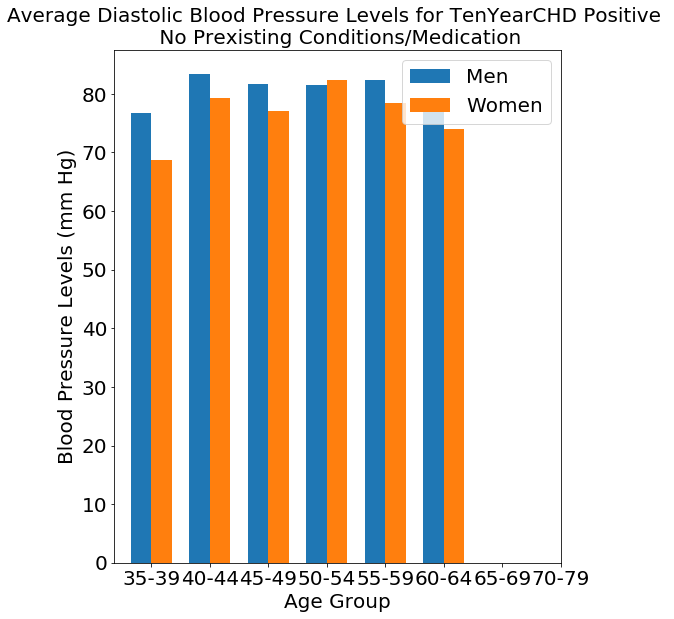

In [1311]:

#Diastolic Blood Pressure by Age Group and Gender (Including All Samples of CHD POsitive)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')
df_new = df_train
df_new['AgeGroup'] = age['AgeGroup']
chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==0]
chd3 = chd2[chd2['prevalentStroke']==0]
chd4 = chd3[chd3['BPMeds']==0]
chd = chd4[chd4['diabetes']==0]
#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==1]['diaBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['diaBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==1]['diaBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==0]['diaBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==1]['diaBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==0]['diaBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==1]['diaBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==0]['diaBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==1]['diaBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==0]['diaBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==1]['diaBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==0]['diaBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==1]['diaBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==0]['diaBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['diaBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['diaBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Diastolic Blood Pressure Levels for TenYearCHD Positive \n No Prexisting Conditions/Medication')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

fig.tight_layout()
plt.show()

<Figure size 648x648 with 0 Axes>

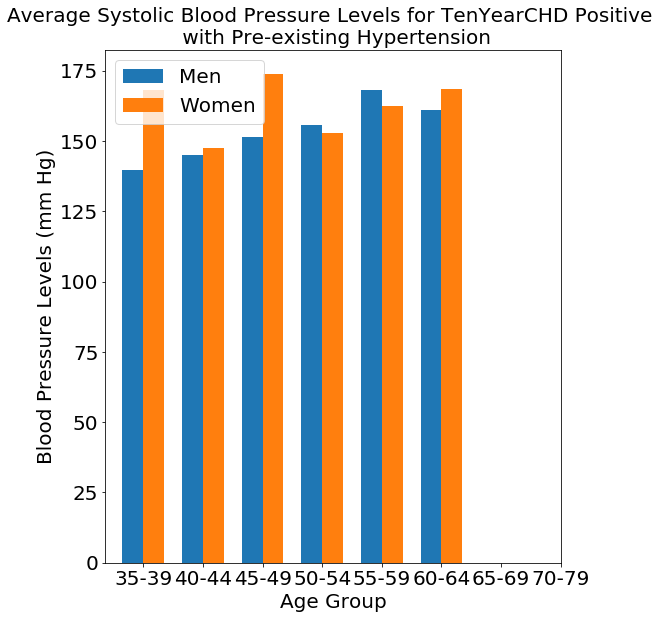

In [1312]:

#Systolic Blood Pressure by Age Group (Prevalent Stroke/Hypertension)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')
df_new = df_train
df_new['AgeGroup'] = age['AgeGroup']

chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==1]
chd3 = chd2[chd2['prevalentStroke']==0]
chd4 = chd3[chd3['BPMeds']==0]
chd = chd4[chd4['diabetes']==0]

#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==1]['sysBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['sysBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==1]['sysBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==0]['sysBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==1]['sysBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==0]['sysBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==1]['sysBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==0]['sysBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==1]['sysBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==0]['sysBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==1]['sysBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==0]['sysBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==1]['sysBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==0]['sysBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['sysBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['sysBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Systolic Blood Pressure Levels for TenYearCHD Positive \n with Pre-existing Hypertension')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

fig.tight_layout()
plt.show()

<Figure size 648x648 with 0 Axes>

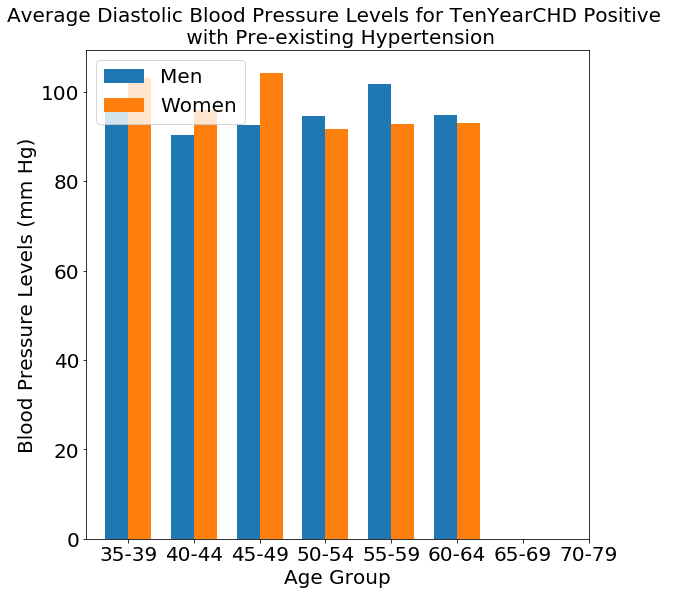

In [1313]:

#Diastolic Blood Pressure by Age Group and Gender (Including Prevalent Hypertension)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')
df_new = df_train.copy(deep=True)
df_new['AgeGroup'] = age['AgeGroup']
chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==1]
chd3 = chd2[chd2['prevalentStroke']==0]
chd4 = chd3[chd3['BPMeds']==0]
chd = chd4[chd4['diabetes']==0]
#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==1]['diaBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['diaBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==1]['diaBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==0]['diaBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==1]['diaBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==0]['diaBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==1]['diaBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==0]['diaBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==1]['diaBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==0]['diaBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==1]['diaBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==0]['diaBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==1]['diaBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==0]['diaBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['diaBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['diaBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Diastolic Blood Pressure Levels for TenYearCHD Positive \n with Pre-existing Hypertension')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

#fig.tight_layout()
plt.show()

<Figure size 648x648 with 0 Axes>

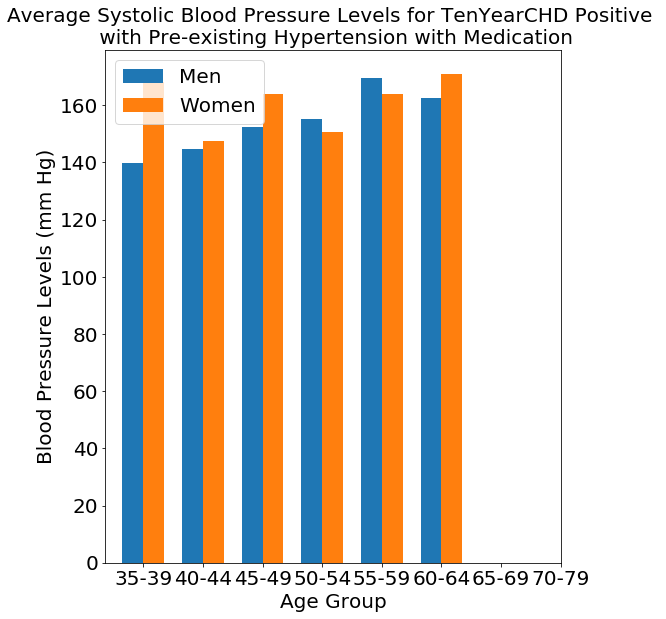

In [1314]:
#Systolic Blood Pressure by Age Group (Prevalent Hypertension + Meds)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')

df_new['AgeGroup'] = age['AgeGroup']
# chd = df_train[df_train['TenYearCHD']==1]


chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==1]
chd3 = chd2[chd2['prevalentStroke']==0]
chd = chd3[chd3['diabetes']==0]

#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==1]['sysBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['sysBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==1]['sysBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==0]['sysBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==1]['sysBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==0]['sysBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==1]['sysBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==0]['sysBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==1]['sysBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==0]['sysBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==1]['sysBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==0]['sysBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==1]['sysBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==0]['sysBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['sysBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['sysBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Systolic Blood Pressure Levels for TenYearCHD Positive \n with Pre-existing Hypertension with Medication')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

fig.tight_layout()
plt.show()





<Figure size 648x648 with 0 Axes>

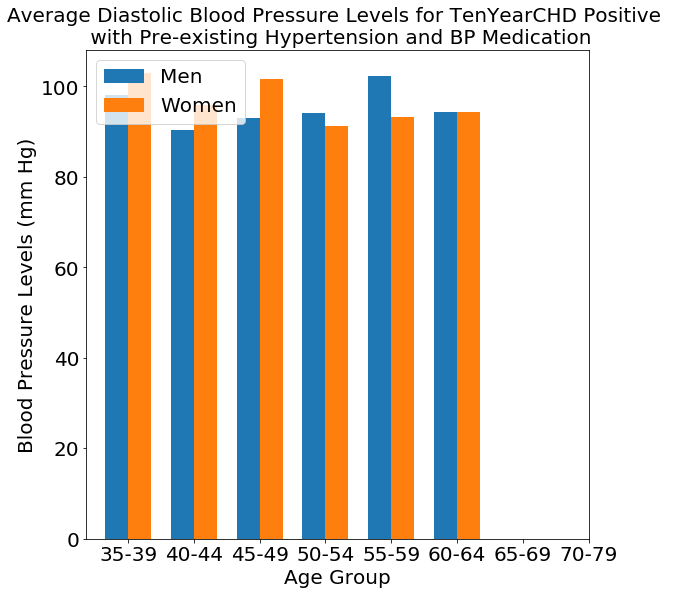

In [1315]:
#Diastolic Blood Pressure by Age Group and Gender (Including Hypertension and BP Meds)
age = pd.DataFrame({'Age':df_train['age']})
#print(age.value_counts())
bins= [30,35,40,45,50,55,60,65,70,80]
labels = ['30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
age['AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=False)
#age['AgeGroup'] = age['AgeGroup'].cat.add_categories('unknown').fillna('unknown')


df_new['AgeGroup'] = age['AgeGroup']
# chd = df_train[df_train['TenYearCHD']==1]


chd1 = df_new[df_new['TenYearCHD']==1]
chd2 = chd1[chd1['prevalentHyp']==1]
chd3 = chd2[chd2['prevalentStroke']==0]
chd = chd3[chd3['diabetes']==0]

#yes_chd['Age'] = df['Age']
#yes_chd['AgeGroup'] = age['AgeGroup']
#Gender and Heart Disease in Specific Age Group
ages35_39_chd = chd[chd['AgeGroup'] == '35-39']
male_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==1]['diaBP'].mean()
female_ages35_39_chd = ages35_39_chd[ages35_39_chd['sex']==0]['diaBP'].mean()

ages40_44_chd = chd[chd['AgeGroup'] == '40-44']
male_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==1]['diaBP'].mean()
female_ages40_44_chd = ages40_44_chd[ages40_44_chd['sex']==0]['diaBP'].mean()

ages45_49_chd = chd[chd['AgeGroup'] == '45-49']
male_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==1]['diaBP'].mean()
female_ages45_49_chd = ages45_49_chd[ages45_49_chd['sex']==0]['diaBP'].mean()

ages50_54_chd = chd[chd['AgeGroup'] == '50-54']
male_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==1]['diaBP'].mean()
female_ages50_54_chd = ages50_54_chd[ages50_54_chd['sex']==0]['diaBP'].mean()

ages55_59_chd = chd[chd['AgeGroup'] == '55-59']
male_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==1]['diaBP'].mean()
female_ages55_59_chd = ages55_59_chd[ages55_59_chd['sex']==0]['diaBP'].mean()

ages60_64_chd = chd[chd['AgeGroup'] == '60-64']
male_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==1]['diaBP'].mean()
female_ages60_64_chd = ages60_64_chd[ages60_64_chd['sex']==0]['diaBP'].mean()

ages65_69_chd = chd[chd['AgeGroup'] == '64-69']
male_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==1]['diaBP'].mean()
female_ages65_69_chd = ages65_69_chd[ages65_69_chd['sex']==0]['diaBP'].mean()

ages70_79_chd = chd[chd['AgeGroup'] == '70-79']
male_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==1]['diaBP'].mean()
female_ages70_79_chd = ages70_79_chd[ages70_79_chd['sex']==0]['diaBP'].mean()


#Plotting Gender/Age by CHD = Positive

labels1 = ['35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-79']
mens = [male_ages35_39_chd,male_ages40_44_chd,male_ages45_49_chd,male_ages50_54_chd,male_ages55_59_chd,
          male_ages60_64_chd,male_ages65_69_chd,male_ages70_79_chd]
womens = [female_ages35_39_chd,female_ages40_44_chd,female_ages45_49_chd,female_ages50_54_chd,female_ages55_59_chd,
          female_ages60_64_chd,female_ages65_69_chd,female_ages70_79_chd]

fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
x1 = np.arange(len(labels1))
#plt.title("Average Glucose Levels relative to Diabetes")
width1 = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects3 = ax.bar(x1 - width1/2, mens, width1, label='Men')
rects4 = ax.bar(x1 + width1/2, womens, width1, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Blood Pressure Levels (mm Hg)')
ax.set_title('Average Diastolic Blood Pressure Levels for TenYearCHD Positive \n with Pre-existing Hypertension and BP Medication')
ax.set_xlabel('Age Group')
ax.set_xticks(x1)
ax.set_xticklabels(labels1)
ax.legend()

#fig.tight_layout()
plt.show()
#=============================#

In [1316]:
import os
my_path = os.getcwd()
print(my_path)
my_file = "feature_importance.png"
fig.savefig(os.path.join(my_path, my_file))

/root


In [1317]:
s3 = boto3.resource('s3')


In [1318]:
file_name = "feature_importance.png"
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'assets/img/{}'.format(file_name))


In [1319]:
file_name = "heart_rate_smoking_chd.JPG"
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'assets/img/{}'.format(file_name))


In [1320]:
file_name = "gender_distribution.png"
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'assets/img/{}'.format(file_name))

In [1321]:
file_name = "age_group_distribution.JPG"
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'assets/img/{}'.format(file_name))
s3.meta.client.upload_file(file_name, 'www.123456789.gwu.edu', 'tempgraph/{}'.format(file_name))